# 000 Testing the vanilla `stellarflow` class

In [1]:
## Imports
import sys
sys.path.append("./source/")

import stellarflow as stf
import numpy as np

## Settings
AU, ED = stf.System._AU, stf.System._ED
print(30300./AU*ED)

0.017499714319129007


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Random Stars Initializations

In [3]:
## For Planet-System scale:
mean = 0
std_x = 10.
std_v = 0.05

## For Interstellar-System scale:
# mean = 0
# std_x = 1000.
# std_v = 1.

In [4]:
N_init = 1000
X0 = np.random.normal(size=(N_init, 3), loc=mean, scale=std_x)
V0 = np.random.normal(size=(N_init, 3), loc=mean, scale=std_v)
M0 = np.random.chisquare(df=1, size=N_init)

## Appending large gravitational center
# X0 = np.concatenate([X0, [3*[0.]]], axis=0)
# V0 = np.concatenate([V0, [3*[0.]]], axis=0)
# M0 = np.concatenate([M0, [1e9]], axis=0)

In [5]:
system = stf.System(X0, V0, M0, dt=1., smooth=1e-3)

In [6]:
x = system._acceleration(system._Q)
system._Q[-1]

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([-1.8456545 ,  8.894678  , -5.3849335 , -0.01138407,  0.01432415,
       -0.03985854], dtype=float32)>

In [7]:
system.simulation(500)

100%|██████████| 500/500 [00:03<00:00, 160.15it/s]


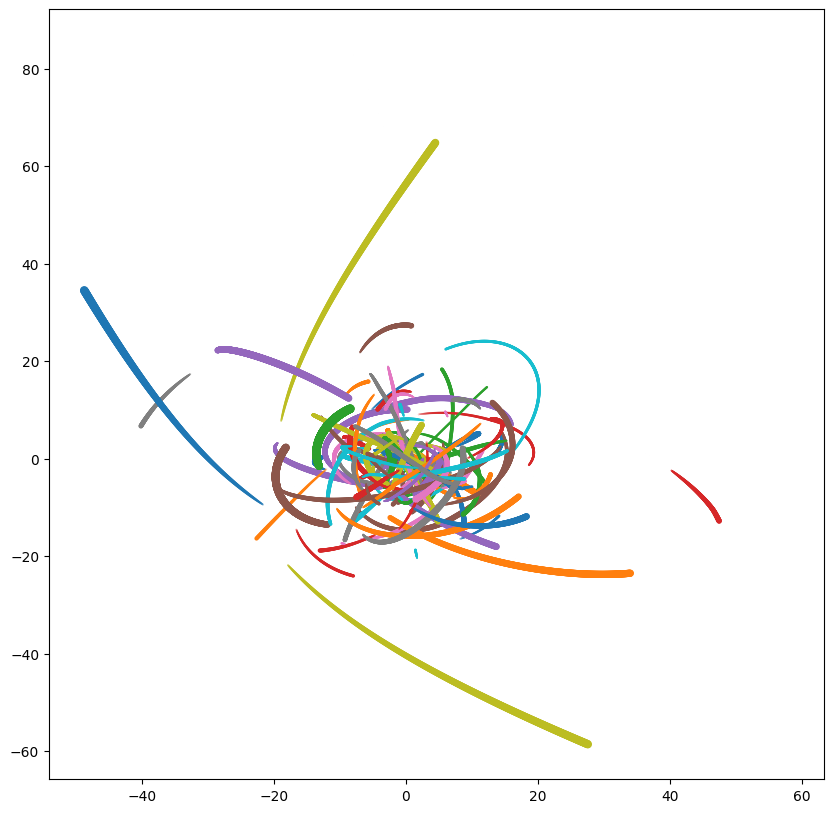

In [8]:
system.plot_history_2d(ZSIZE=True, SUBSET=True, n_sample=100)

In [9]:
# system.plot_history_3d()

## 2 Suns

In [10]:
X = np.array([
    [-1., 0., 0.], # Sun 
    [ 1., 0., 0.], # Sun 2
    [ 0., 0., 0.]  # Poor Planet
])

V = np.array([
    [0., -0.01, 0.], # Sun 
    [0.,  0.01, 0.], # Sun 2
    [ 0., 0.001, 0.001]   # Poor Planet
])

M = np.array([
    1.,  # Sun
    1.,  # Sun2
    1e-5 # Poor Planet
])

In [11]:
S2_system = stf.System(X, V, M, dt=1)

In [12]:
S2_system.step()

In [13]:
S2_system._Q

<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[-9.9996299e-01, -9.9998768e-03,  4.9317668e-13,  7.3981377e-05,
        -9.9996300e-03,  1.4794795e-12],
       [ 9.9996299e-01,  9.9998768e-03,  4.9318541e-13, -7.3981377e-05,
         9.9996300e-03,  1.4795242e-12],
       [ 1.4764640e-09,  9.9990133e-04,  9.9990133e-04,  5.9148468e-09,
         9.9970424e-04,  9.9970412e-04]], dtype=float32)>

In [14]:
S2_system._Q_hist

<tf.Tensor: shape=(2, 3, 6), dtype=float32, numpy=
array([[[-1.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         -9.9999998e-03,  0.0000000e+00],
        [ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          9.9999998e-03,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          1.0000000e-03,  1.0000000e-03]],

       [[-9.9996299e-01, -9.9998768e-03,  4.9317668e-13,  7.3981377e-05,
         -9.9996300e-03,  1.4794795e-12],
        [ 9.9996299e-01,  9.9998768e-03,  4.9318541e-13, -7.3981377e-05,
          9.9996300e-03,  1.4795242e-12],
        [ 1.4764640e-09,  9.9990133e-04,  9.9990133e-04,  5.9148468e-09,
          9.9970424e-04,  9.9970412e-04]]], dtype=float32)>

In [15]:
S2_system.simulation(3*365)

100%|██████████| 1095/1095 [00:03<00:00, 348.84it/s]


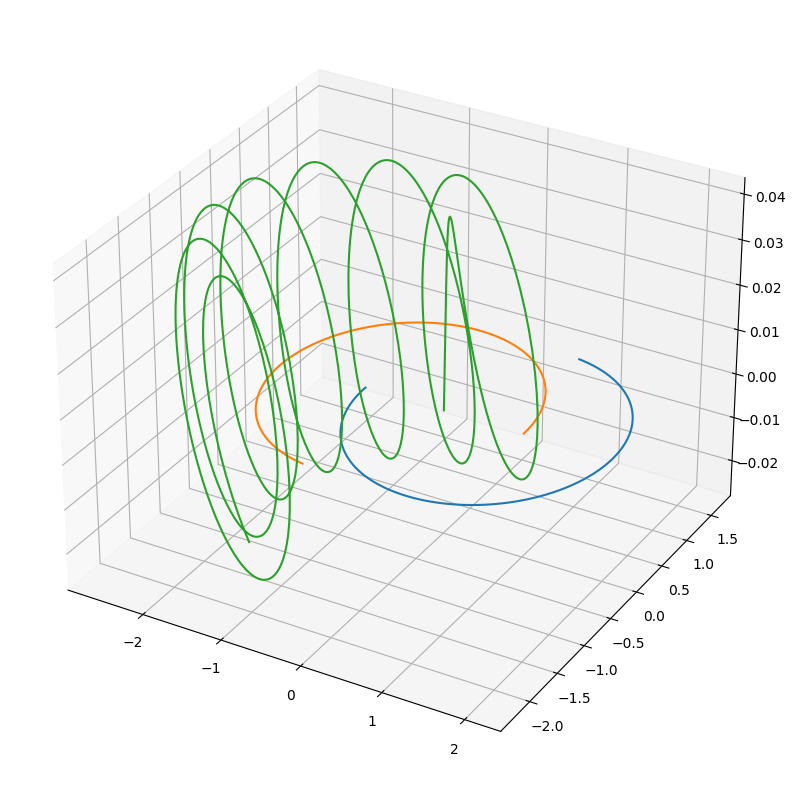

In [16]:
S2_system.plot_history_3d()

## Sun-Earth-Mars

In [17]:
X = np.array([
    [0., 0.,    0.], # Sun 
    [1., 0.,    0.], # Earth
    [0., 1.524, 0.]  # Mars
])

V = np.array([
    [0.,           0., 0.], # Sun 
    [0., 29290./AU*ED, 0.],  # Earth
    [27070./AU*ED, 0., 0.],  # Mars
])

M = np.array([
    1.,                # Sun
    3.0025e-6,         # Earth
    0.107 * 3.0025e-6  # Mars
])

In [18]:
SEM_system = stf.System(X, V, M)

In [19]:
SEM_system.simulation(3*365)

100%|██████████| 1095/1095 [00:03<00:00, 308.80it/s]


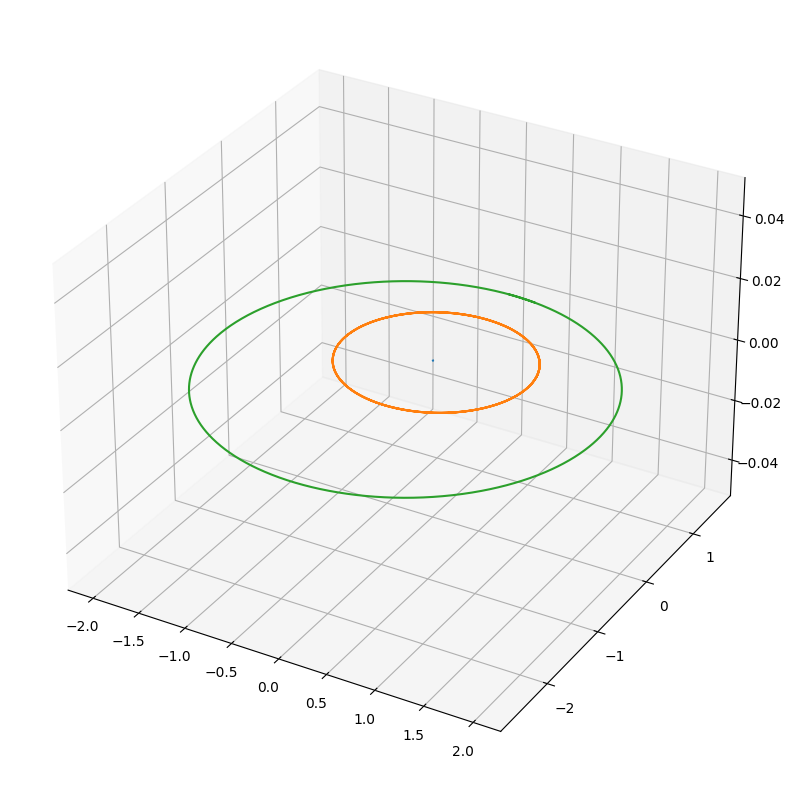

In [20]:
SEM_system.plot_history_3d()

## Earth Moon

In [21]:
X = np.array([
    [0., 0.,  0.], # Earth
    [383397000./AU, 0., 0.]  # Moon
])

V = np.array([
    [0., 0.,          0.], # Earth
    [0., 1023./AU*ED, 0.]  # Moon
])

M = np.array([
    3.0025e-6,         # Earth
    3.0025e-6 / 81.3   # Moon
])

In [22]:
EMo_system = stf.System(X, V, M, dt=0.01)

In [23]:
EMo_system.simulation(int(300))

100%|██████████| 300/300 [00:01<00:00, 228.14it/s]


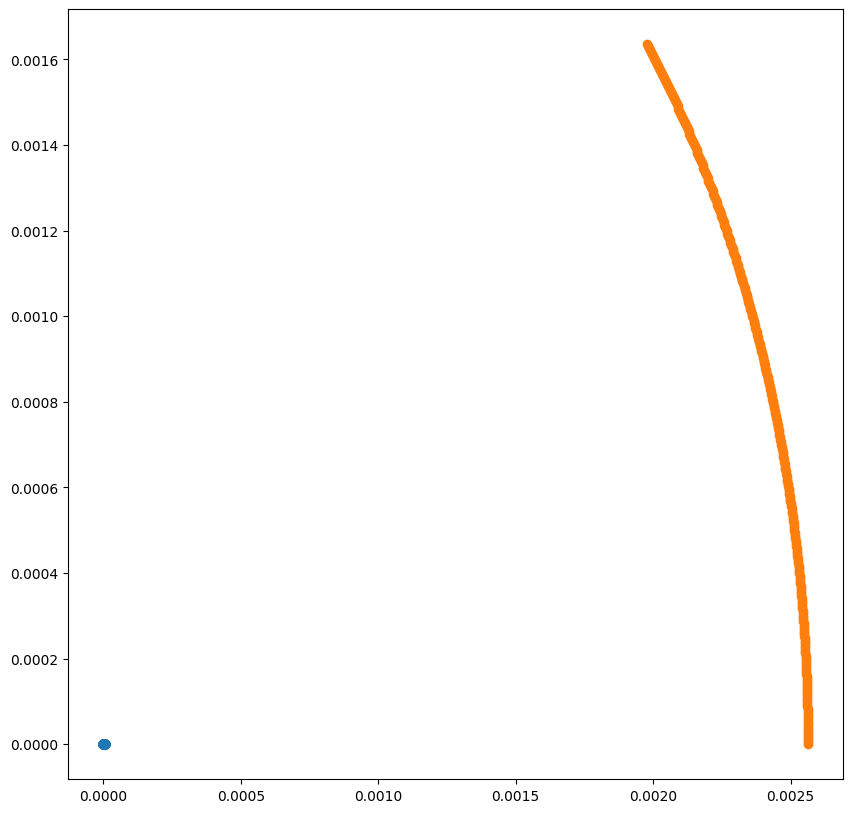

In [24]:
EMo_system.plot_history_2d()

## Sun Earth Moon

In [25]:
## Ecliptic tilt
sigma = 5. * np.pi / 180.

X = np.array([
    [0., 0.,    0.], # Sun 
    [1., 0.,    0.], # Earth
    [1. + 383397000./AU, 0., 0.]  # Moon
])

V = np.array([
    [0.,                     0., 0.], # Sun 
    [0.,           29290./AU*ED, 0.], # Earth
    [0., (29290. + 1023.)/AU*ED, 0.]  # Moon  # (29290. + 1023.*np.cos(sigma))/AU*ED, 1023.*np.sin(sigma)/AU*ED
])

M = np.array([
    1.,                # Sun
    3.0025e-6,         # Earth
    3.0025e-6 / 81.3   # Moon
])

In [26]:
SEMo_system = stf.System(X, V, M, dt=1)

In [27]:
SEMo_system.simulation(1*365)

100%|██████████| 365/365 [00:01<00:00, 251.90it/s]


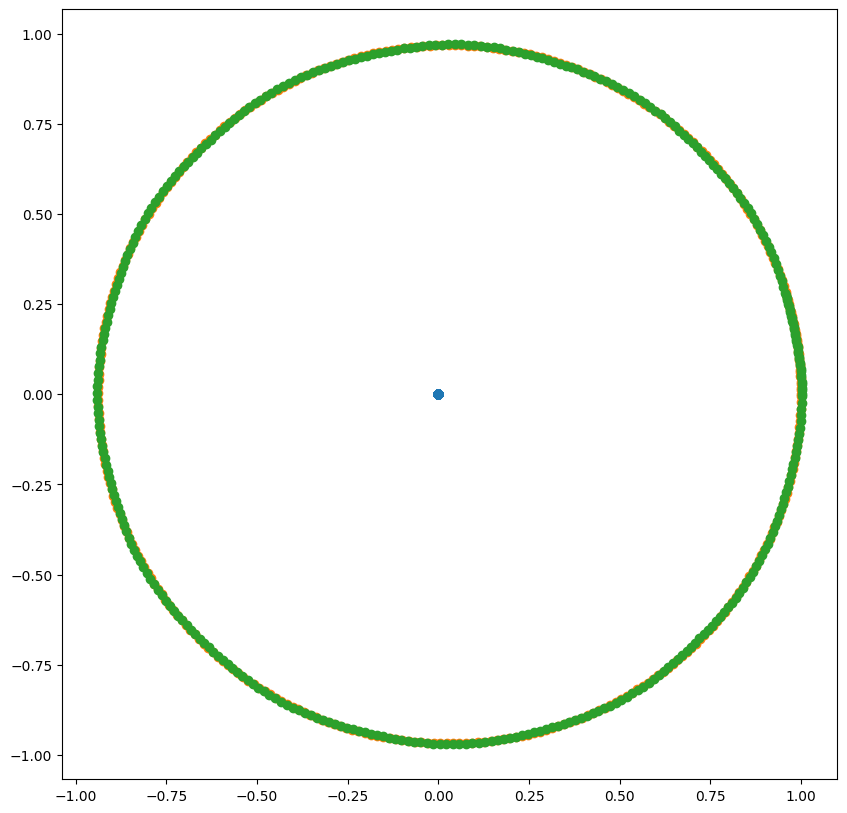

In [28]:
SEMo_system.plot_history_2d()

In [29]:
x_earth = SEMo_system._Q_hist[:, 1, :3]
x_moon  = SEMo_system._Q_hist[:, 2, :3]
x_diff = x_moon - x_earth

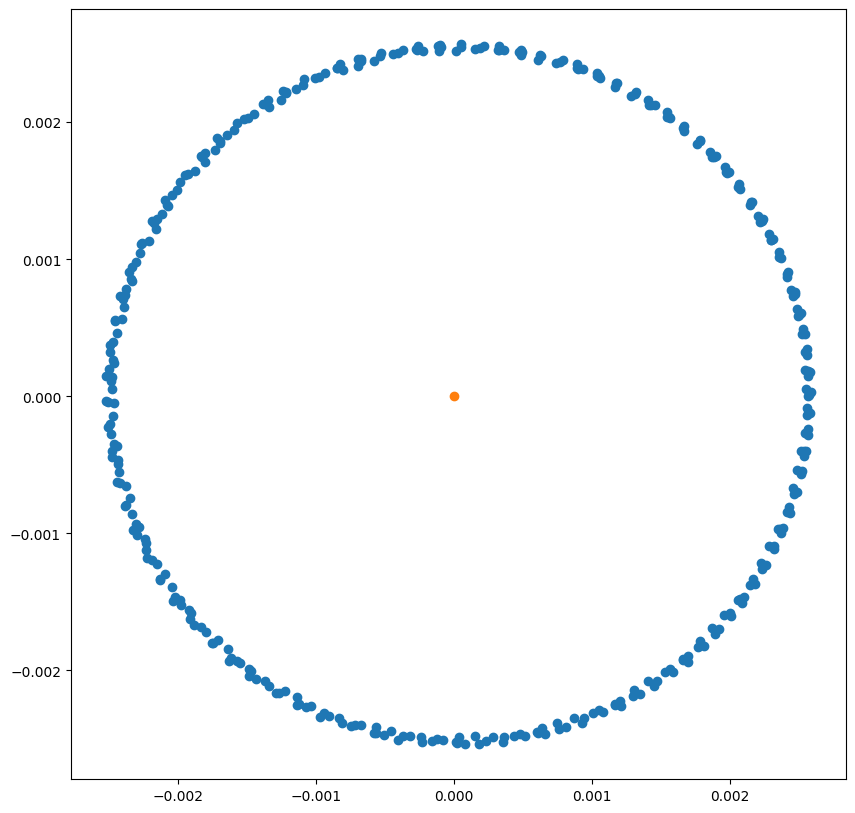

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(x_diff[:, 0], x_diff[:, 1])
plt.scatter(0, 0)
plt.show()